In [ ]:
# Intalar librerias
if (!requireNamespace("arules"))
  install.packages("arules")

Loading required namespace: arules



In [ ]:
#install.packages(c("arulesViz", "tidyr", "dplyr", "ggplot2", "readr"))
if (!requireNamespace("arulesViz"))
    install.packages("arulesViz")
if (!requireNamespace("tidyr"))
    install.packages("tidyr")
if (!requireNamespace("dplyr"))
    install.packages("dplyr")
if (!requireNamespace("ggplot2"))
    install.packages("ggplot2")
if (!requireNamespace("readr"))
    install.packages("readr")

Loading required namespace: arulesViz



In [ ]:
#
# CARGA LIBRERIA Y DATOS
# --------------------------------------------------------------
library(arules)
library(arulesViz);
library(ggplot2)
library(tidyr)
library(dplyr)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write



Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack



Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
library(readr)
# Arrastramos el fichero Groceries.csv la carpeta Archivos
#MisDatos <- read_csv("OnlineRetail_12.csv")
MisDatos <- read_delim("OnlineRetail_12.csv",";", escape_double = FALSE, col_types = cols(Description = col_character()), trim_ws = TRUE)


# TRANSFORMA Data.Frame en TRANSACCIONAL
# --------------------------------------------------------------
# Transforma  data.frame en transaccional
trx       <- MisDatos  #Misdatos
trx       <- split(trx$Description,trx$InvoiceNo) # convierte datos en lista
trx       <- as(trx,"transactions") # convierte datos en transacciones


Warning message in asMethod(object):
“removing duplicated items in transactions”


In [ ]:
# CREA REGLAS
# --------------------------------------------------------------
reglas <- apriori(trx, parameter=list(support=0.01, confidence = 0.05)) 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.05    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[2666 item(s), 1550 transaction(s)] done [0.02s].
sorting and recoding items ... [794 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(trx, parameter = list(support = 0.01, confidence = 0.05)):
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [0.10s].
writing ... [929483 rule(s)] done [0.34s].
creating S4 object  ... done [0.28s].


In [ ]:
#Pregunta 1. data.frame con frecuencia porcentual de cada producto
FreqProd <- data.frame(Producto=names(itemFrequency(trx)), 
                       Frecuencia=itemFrequency(trx), row.names=NULL)
FreqProd <- FreqProd[order(FreqProd$Frecuencia, decreasing = T),]
FreqProd

,Producto,Frecuencia
,<chr>,<dbl>
1758,RABBIT NIGHT LIGHT,0.13935484
1557,PAPER CHAIN KIT 50'S CHRISTMAS,0.11870968
1561,PAPER CHAIN KIT VINTAGE CHRISTMAS,0.09161290
1104,HOT WATER BOTTLE KEEP CALM,0.08580645
2544,WHITE HANGING HEART T-LIGHT HOLDER,0.07870968
1162,JUMBO BAG 50'S CHRISTMAS,0.07548387
186,BAKING SET 9 PIECE RETROSPOT,0.07032258
2593,WOODEN STAR CHRISTMAS SCANDINAVIAN,0.06838710
1726,POPCORN HOLDER,0.06774194


In [ ]:
#Pregunta 2. Indique las 5 reglas que tuvieron menor soporte dentro de su dataset.
reglas <-sort(reglas, by="support", decreasing=FALSE) # ordena regla 
inspect(head(reglas,5))

    lhs                            rhs                                   support confidence   coverage     lift count
[1] {FELTCRAFT GIRL NICOLE KIT} => {FELTCRAFT GIRL AMELIE KIT}        0.01032258  0.7272727 0.01419355 26.83983    16
[2] {FELTCRAFT GIRL AMELIE KIT} => {FELTCRAFT GIRL NICOLE KIT}        0.01032258  0.3809524 0.02709677 26.83983    16
[3] {FELTCRAFT DOLL EMILY}      => {FELTCRAFT DOLL ROSIE}             0.01032258  0.5925926 0.01741935 27.83389    16
[4] {FELTCRAFT DOLL ROSIE}      => {FELTCRAFT DOLL EMILY}             0.01032258  0.4848485 0.02129032 27.83389    16
[5] {GLITTER CHRISTMAS STAR}    => {CHRISTMAS HANGING STAR WITH BELL} 0.01032258  0.5925926 0.01741935 16.11436    16


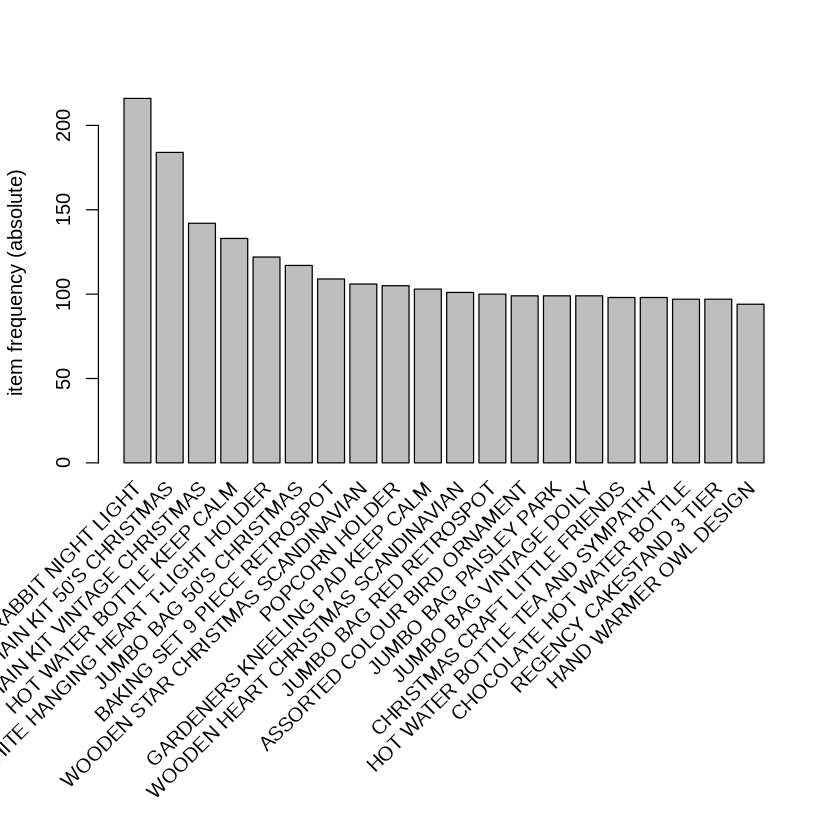

In [ ]:
#Pregunta 3. Grafique los 20 productos con mayor frecuencia de ventas.
itemFrequencyPlot(trx,topN=20,type="absolute")

In [ ]:
# Pregunta 4. Indique las 10 reglas que tienen mayor confianza. ¿Qué indican estas reglas?
reglas <-sort(reglas, by="confidence", decreasing=TRUE) # ordena regla 
inspect(head(reglas,10))

     lhs                                      rhs                                      support confidence   coverage      lift count
[1]  {STAR WREATH DECORATION WITH BELL,                                                                                             
      WOODEN HEART CHRISTMAS SCANDINAVIAN} => {RED ROCKING HORSE HAND PAINTED}      0.01032258          1 0.01032258 48.437500    16
[2]  {STAR WREATH DECORATION WITH BELL,                                                                                             
      WOODEN STAR CHRISTMAS SCANDINAVIAN}  => {RED ROCKING HORSE HAND PAINTED}      0.01032258          1 0.01032258 48.437500    16
[3]  {STAR WREATH DECORATION WITH BELL,                                                                                             
      WOODEN HEART CHRISTMAS SCANDINAVIAN} => {WOODEN STAR CHRISTMAS SCANDINAVIAN}  0.01032258          1 0.01032258 14.622642    16
[4]  {STAR WREATH DECORATION WITH BELL,                              

In [ ]:
#Pregunta 5. imprime las 3 reglas con mayor confianza (Probando 3 reglas)
reglas <-sort(reglas, by="confidence", decreasing=TRUE) # ordena regla 
inspect(head(reglas,3))

    lhs                                      rhs                                     support confidence   coverage     lift count
[1] {STAR WREATH DECORATION WITH BELL,                                                                                           
     WOODEN HEART CHRISTMAS SCANDINAVIAN} => {RED ROCKING HORSE HAND PAINTED}     0.01032258          1 0.01032258 48.43750    16
[2] {STAR WREATH DECORATION WITH BELL,                                                                                           
     WOODEN STAR CHRISTMAS SCANDINAVIAN}  => {RED ROCKING HORSE HAND PAINTED}     0.01032258          1 0.01032258 48.43750    16
[3] {STAR WREATH DECORATION WITH BELL,                                                                                           
     WOODEN HEART CHRISTMAS SCANDINAVIAN} => {WOODEN STAR CHRISTMAS SCANDINAVIAN} 0.01032258          1 0.01032258 14.62264    16


Pregunta 7. Support 0.01 y 2 confidence (0.01 y 0.05)


In [27]:
#Pregunta 8. Guarde las transacciones obtenidas del datset en un fichero llamado MyMarket.csv. 
write(sort(reglas, by="support", decreasing=TRUE), file = "MyMarket.csv", sep = ",")